In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
print(df.shape[0])
df.head()
x1 = df.iloc[:,0]
y = df.iloc[:,2]

10


In [2]:
b0 = 0
b1 = 0
beta1 = []
predicted = []
err = []
alpha = 0.2
for i in range(df.shape[0]):
    z = b0 + (b1*x1[i])
    pred = 1/(1+np.exp(-z))
    predicted.append(pred)
    error = pred - y[i]
    err.append(error)
    b0 = b0 + (alpha*error*pred*(1-pred))
    b1 = b1 + (alpha*error*pred*(1-pred)*x1[i])
    beta1.append(b1)
print(b0,b1)

0.1312388873927396 0.289437107263494


In [3]:
count = 0

for i in range(df.shape[0]):
    if predicted[i] > 0.5:
        predicted[i] = 1
    else:
        predicted[i] = 0
    if y[i] - predicted[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
accuracy

60.0

In [4]:
print(err,beta1)

[0.5, 0.5316803034242827, 0.6033455075016927, 0.5907041020799754, 0.7032617665428113, -0.06290665590965949, -0.13021373701706063, -0.09008981831389773, -0.05875516964181704, -0.08128509380940163] [0.0695271, 0.10832927999182002, 0.206416875003053, 0.246064641713486, 0.3360012454347243, 0.3303441952943444, 0.3146158800626114, 0.30439121730823243, 0.29875334509665297, 0.289437107263494]


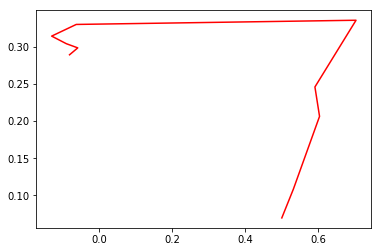

In [5]:
plt.plot(err,beta1,color = 'red')

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


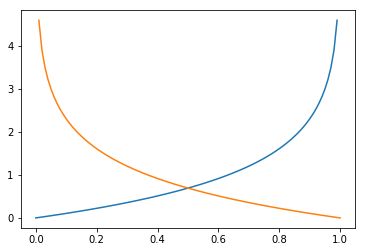

In [6]:
x = np.linspace(0,1,100)
Y = -np.log(1-x)
z = -np.log(x)
plt.plot(x,Y)
plt.plot(x,z)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [8]:
x = np.array(x1)
x = x.reshape(-1,1)
print(x)

[[2.781084]
 [1.465489]
 [3.396562]
 [1.38807 ]
 [3.064072]
 [7.627531]
 [5.332441]
 [6.922597]
 [8.675419]
 [7.673756]]


In [9]:
model = LogisticRegression(solver='liblinear')
model.fit(x, y)
y_pred = model.predict(x)

In [10]:
count = 0

for i in range(df.shape[0]):
    if y[i] - y_pred[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
accuracy

90.0